# Socio-Economic Background of Guardians of Secondary Level Students of Different Districts

### Introduction 
The education system in Bangladesh is divided into four stages.

1. Primary Level
2. Secondary Level
3. Higher Secondary Level
4. Higher Level

The secondary level is High School which incorporates grade 6 to 10. There are both English Medium and Bangla Medium schools in all 64 districts. Government prefer Bangla medium schools. Though there are some cadet colleges which are also government owned institutions and they offer English medium studies. Usually, the private schools offer English medium. [1]

### Problem Statement
The purpose of this analysis is to gain useful information and insights using available data. 

In this analysis, we will try to answer three questions from the data.
1. what are the top 10 districts containing most gurdians in each occupation?
2. what are the top 10 schools with highest percentage of gurdians for each occupation?
3. what is the occupation of the most of the gurdians in different classes?

### Data Source
This data is downloaded from Education section of [Bengladesh Open data | Data for all](http://data.gov.bd/)

### Exploratory Data Analysis

#### Inspecting the data
This data is in Excel file format. Looks like this: 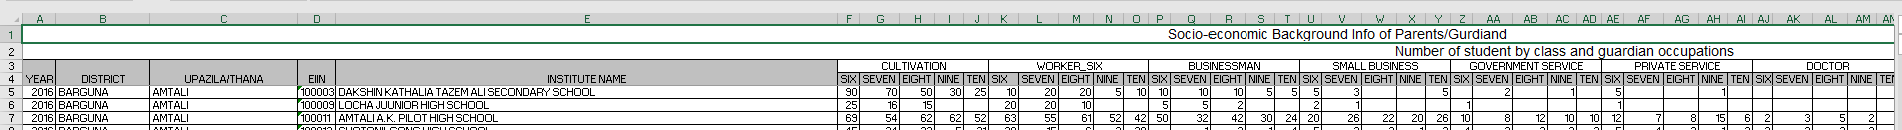

In [21]:
import numpy as np
import pandas as pd


In [22]:
df = pd.read_excel("school_data.xls" , skiprows = 2)

In [23]:
df.head(3)

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,CULTIVATION,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,ENGINEER,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,OTHERS,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,NaN,NaN,NaN,NaN,NaN,SIX,SEVEN,EIGHT,NINE,TEN,...,SIX,SEVEN,EIGHT,NINE,TEN,SIX,SEVEN,EIGHT,NINE,TEN
1,2016.0,BARGUNA,AMTALI,100003.0,DAKSHIN KATHALIA TAZEM ALI SECONDARY SCHOOL,90,70,50,30,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.0,BARGUNA,AMTALI,100009.0,LOCHA JUUNIOR HIGH SCHOOL,25,16,15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN


In [24]:
df.shape

(19280, 80)

Looks like there is 19280 Rows of schools and 80 columns. Occupation of gurdians are in merged column of number of gurdians in class six, seven, eight, nine and Ten data.  

#### Manipulating the data
Socio Economic Backgrounds of the gurdians are categorized in 15 different categories. We will make an occupation column for each school so that data is well organized and easy to understand. 

In [25]:
def convert_data(path):
    import pandas as pd
    import numpy as np
    
    df = pd.read_excel(path,header = None,  skiprows = 4)
    d = df[list(range(10))].copy()
    d.columns = ['YEAR','DISTRICT','UPAZILA/THANA','EIIN','INSTITUTE NAME','SIX',
                          'SEVEN','EIGHT','NINE','TEN']
    d["OCCUPATION"] = "cultivation"
    list_of_occupation = [{"worker_six":list(range(5)) + list(range(10, 15))},
                      {"businessman":list(range(5)) + list(range(15, 20))},
                     {"small business": list(range(5)) + list(range(20, 25))},
                     {"government service": list(range(5)) + list(range(25, 30))},
                     {"private service": list(range(5)) + list(range(30, 35))},
                     {"doctor": list(range(5)) + list(range(35, 40))}, 
                     {"lawyer": list(range(5)) + list(range(40, 45))},
                     {"teacher": list(range(5)) + list(range(45, 50))},
                     {"fisherman": list(range(5)) + list(range(50, 55))},
                     {"tati": list(range(5)) + list(range(55, 60))},
                     {"kamar-kumar":list(range(5)) + list(range(60, 65))},
                     {"expatriate": list(range(5)) + list(range(65, 70))},
                     {"engineer": list(range(5)) + list(range(70, 75))},
                     {"others": list(range(5)) + list(range(75, 80))} ]
    
    for item in list_of_occupation:
        t = list(item.items())[0][0]
        cols = list(item.items())[0][1]
        df_new = df[cols]
        df_new.columns = ['YEAR','DISTRICT','UPAZILA/THANA','EIIN','INSTITUTE NAME','SIX',
                          'SEVEN','EIGHT','NINE','TEN']
        df_new["OCCUPATION"] = t
        d = pd.concat([d, df_new])
    
    return d

In [26]:
%%time
latest_data = convert_data("school_data.xls")

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 2.85 s


In [27]:
latest_data.head()

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,SIX,SEVEN,EIGHT,NINE,TEN,OCCUPATION
0,2016,BARGUNA,AMTALI,100003,DAKSHIN KATHALIA TAZEM ALI SECONDARY SCHOOL,90.0,70.0,50.0,30.0,25.0,cultivation
1,2016,BARGUNA,AMTALI,100009,LOCHA JUUNIOR HIGH SCHOOL,25.0,16.0,15.0,NaN,NaN,cultivation
2,2016,BARGUNA,AMTALI,100011,AMTALI A.K. PILOT HIGH SCHOOL,69.0,54.0,62.0,62.0,52.0,cultivation
3,2016,BARGUNA,AMTALI,100012,CHOTONILGONG HIGH SCHOOL,45.0,34.0,32.0,5.0,21.0,cultivation
4,2016,BARGUNA,AMTALI,100014,SHAKHRIA HIGH SCHOOL,25.0,25.0,20.0,25.0,20.0,cultivation


In [28]:
col_names = [col.lower().replace("/", " ").split(" ", 1)[0] for col in latest_data.columns ]
latest_data.columns = col_names


In [29]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289185 entries, 0 to 19278
Data columns (total 11 columns):
year          289185 non-null int64
district      289185 non-null object
upazila       289185 non-null object
eiin          289185 non-null int64
institute     289185 non-null object
six           119427 non-null float64
seven         117811 non-null float64
eight         115688 non-null float64
nine          105887 non-null float64
ten           102283 non-null float64
occupation    289185 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 26.5+ MB


######  Handling missing values
There is Lots of missing values in the six, seven, eight, nine and ten columns. As the number in these columns is the number of gurdians, it is logical to impute this missing values with 0.

In [30]:
latest_data.fillna(0, inplace = True)


In [31]:
df = latest_data.copy()

Creating a column named <strong>total</strong> which represents the number of gurdians for each occupation category in a school. 

In [32]:
df['total'] = df[['six', 'seven', 'eight', 'nine', 'ten']].sum(axis = 1)


#### Data visualization

Now we are going to visualize Number of gurdians in each occupation by Districts.Only Top 10 districts are shown below. 

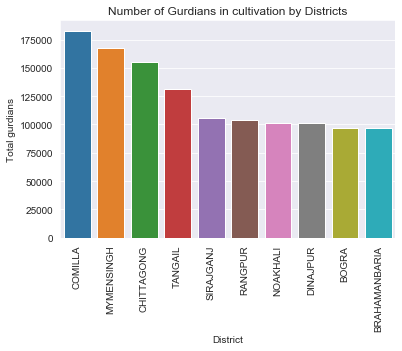

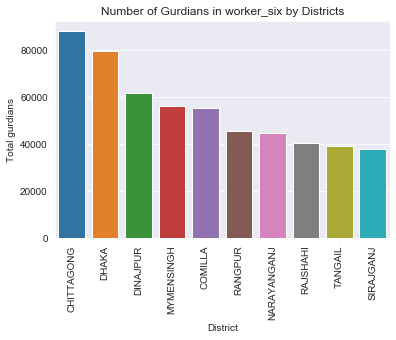

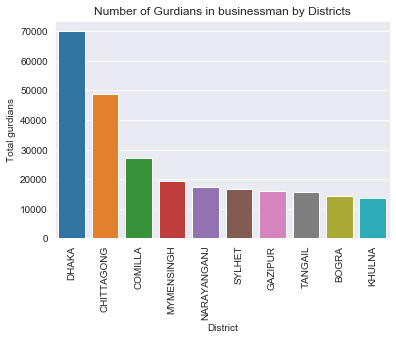

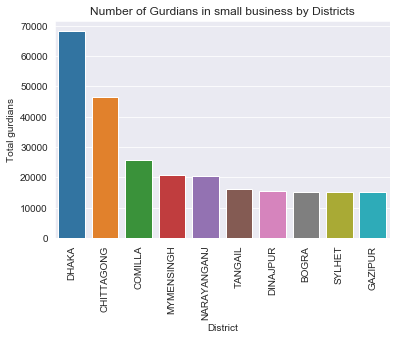

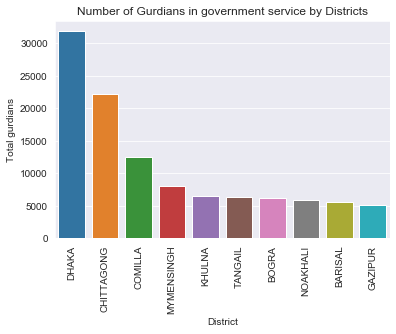

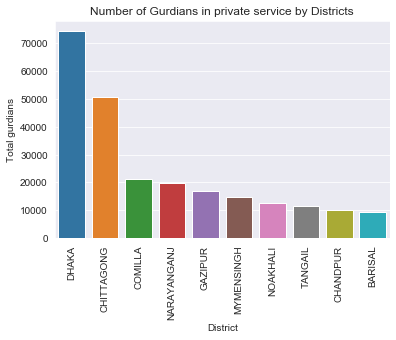

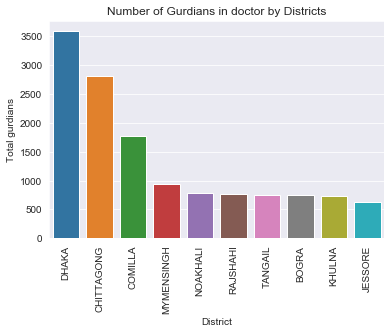

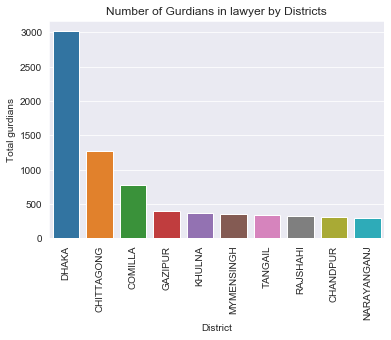

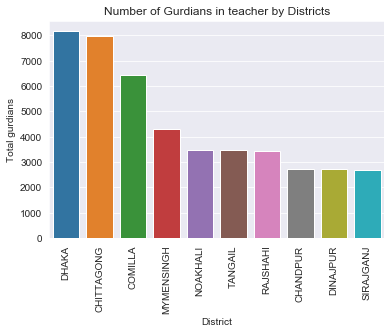

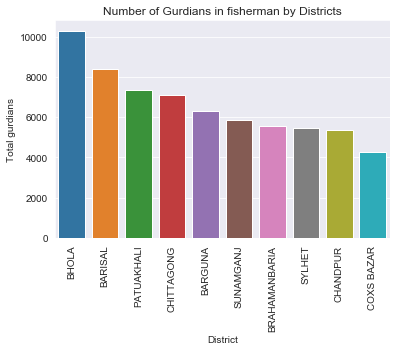

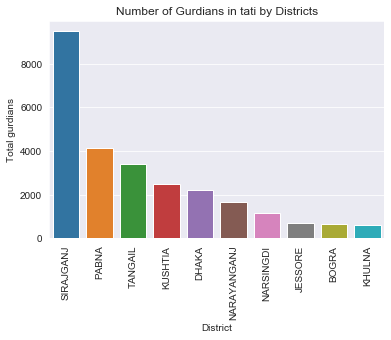

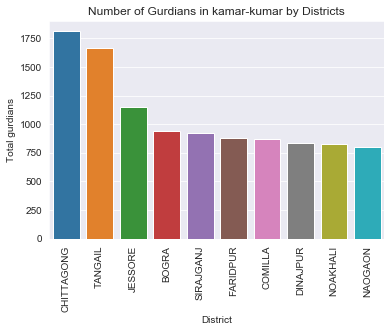

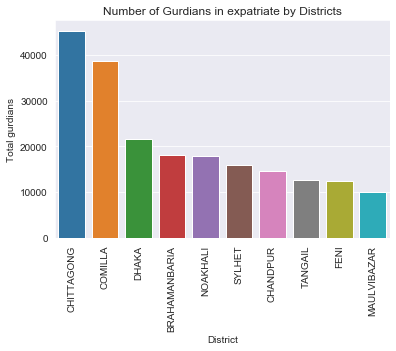

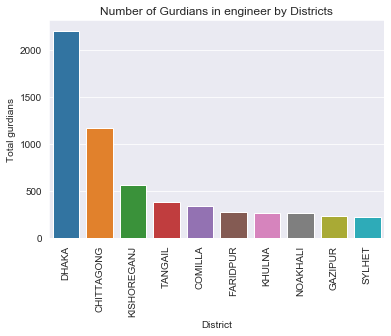

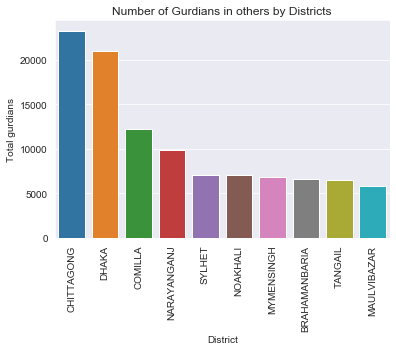

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

occupations = list(df['occupation'].unique())

for occupation in occupations:
    data = df[df["occupation"] == occupation]
    tati_data_by_top10_district = data.groupby("district")["total"].sum().sort_values(ascending = False)[:10]
    tati_data_by_top10_district = tati_data_by_top10_district.to_frame()
    tati_data_by_top10_district.reset_index(inplace = True)

    sns.set_style("darkgrid")
    sns.barplot(data = tati_data_by_top10_district, x = "district", y=  "total")
    plt.ylabel("Total gurdians")
    plt.xlabel("District")
    plt.title("Number of Gurdians in {} by Districts".format(occupation))
    plt.xticks(rotation=90)
    plt.savefig("top_10_district/Top 10 district in {}.png".format(occupation))
    plt.show()



##### Insights from this visualization
- Dhaka, Chittagong, Comilla are the top 3 districts sequentially in Business, Government Service, Private Service, Doctor, Lawyer, Teacher categories. 
- Comilla, Mymensingh and Chittagong have the highest number of gurdians in cultivation. Comilla has more than 175000 gurdians in cultivation where Mymensingh and Chittagong has more than 150000 and 125000 gurdians in cultivation respectively. Other districts in top 10 districts in cultivation are Tangail, Sirajgonj, Rangpur, Noakhali, Dinajpur, Bogra, BrahmanBaria serially.
- In Fisherman category, highest number of gurdians (More than 10000) of students are in Bhola district followed by Barishal and Patuakhali. This districts are situated near the Bay of Bengal and there are many rivers in those districts. Other districts in top 10 are Chittagong, Barguna, Sunamgonj, BrahmanBaria, Sylhet, Chandpur and Coxs Bazar. 
- In Tati Occupation, more than 8000 gurdians are in Sirajgonj which is the highest among the other districts. Pabna and Tangail has more than 3000 gurdians who are tati. 
- Chittagong, Tangail, Jessore are the top 3 in Kamar-kumar and Chittagong, comilla and Dhaka are the top 3 district having the most number of gurdians who are expatriate. 
- Most of the gurdians who are Engineer are in Dhaka, Chittagong and kishoregong. other districts in top 10 are Tangail, Comilla, Faridpur, Khulna, Noakhali, Gazipur and Sylhet.  

In the next section, The visualization of Percentage of gurdians in each occupation in different schools. Top 10 School with highest percentage for each occupation is shown.

In [34]:
new_df = df.copy()
new_df.shape

(289185, 12)

In [35]:
total_students = new_df.groupby("eiin")['total'].sum()
total = list(new_df['total'])
eiin = list(new_df['eiin'])
eiin_and_total = new_df[['eiin', 'total']]
percentage = []
for indx, item in enumerate(eiin):
    if (total_students[item] != 0):
        p = round((total[indx] /total_students[item])*100, 2)
        percentage.append(p)
    else:
        percentage.append(0)
        
new_df['percentage'] = percentage

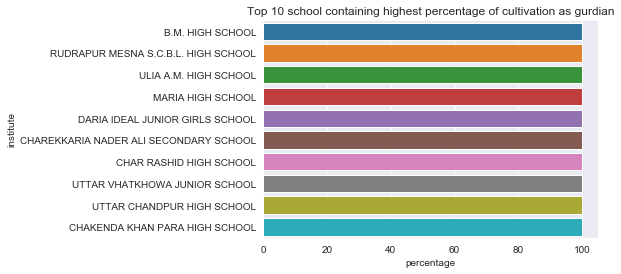

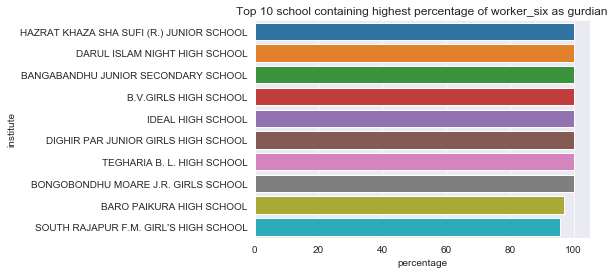

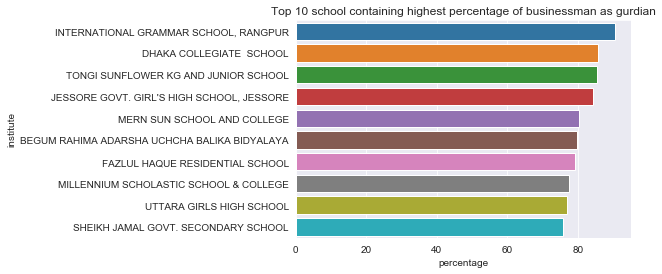

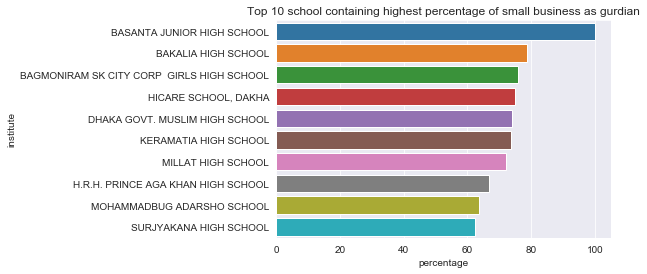

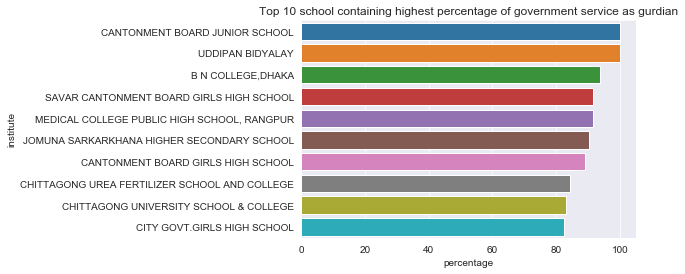

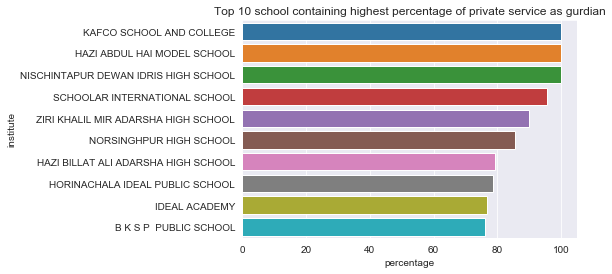

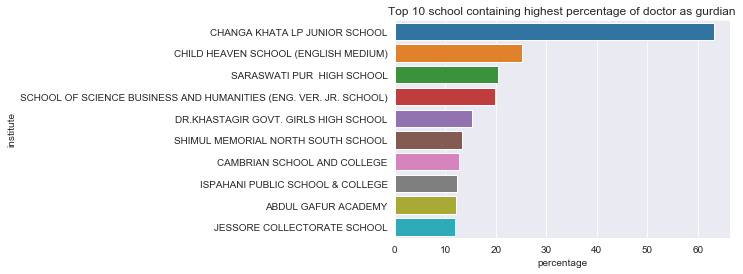

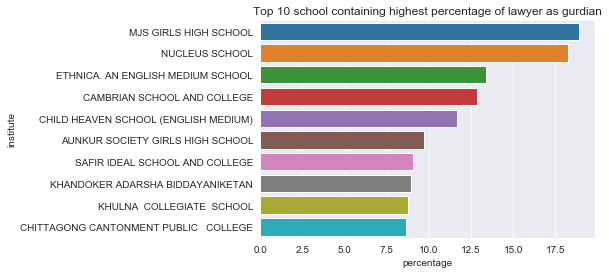

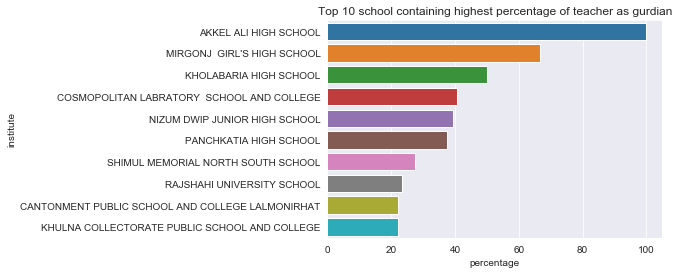

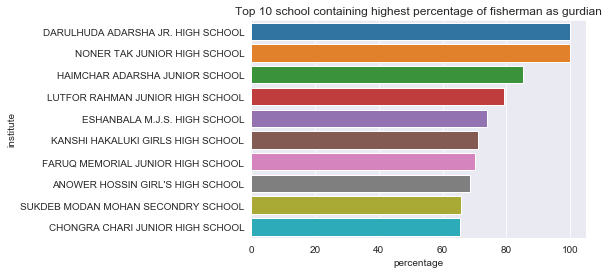

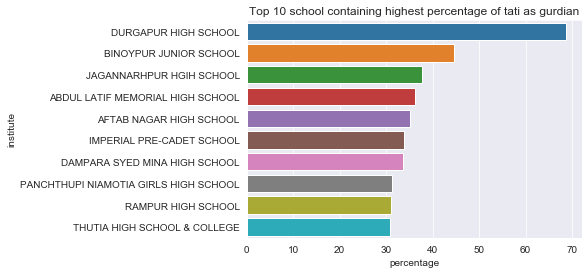

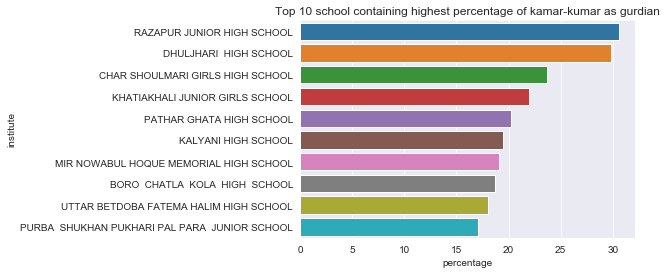

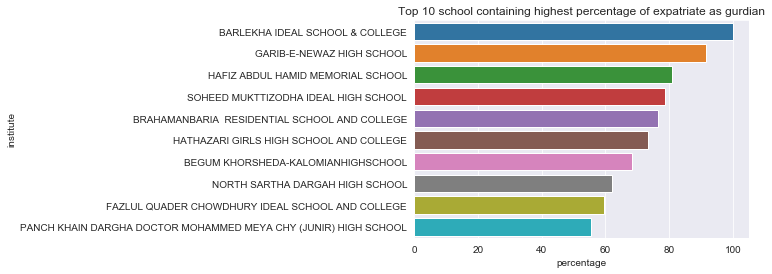

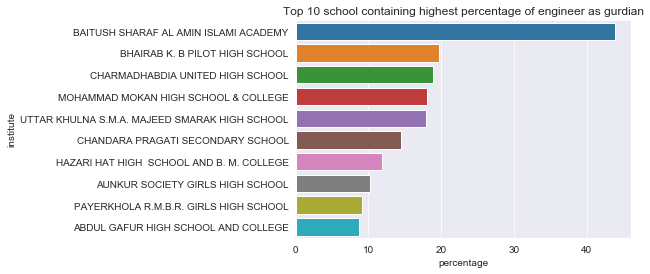

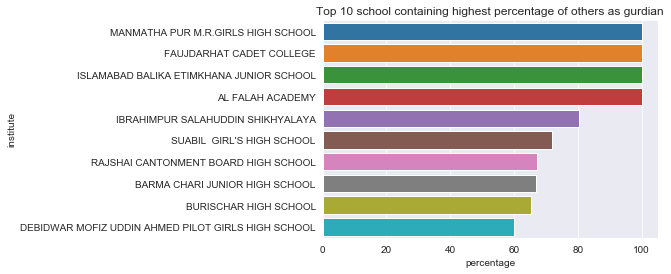

In [36]:
for occupation in occupations:
    df_institute_percentage = new_df[new_df['occupation'] == occupation].sort_values('percentage', ascending = False)[:10]
    sns.barplot(data = df_institute_percentage, y= 'institute', x = 'percentage')
    plt.title("Top 10 school containing highest percentage of {} as gurdian".format(occupation))
    plt.savefig("top_10_school/Top 10 school in percentage of {} as gurdian.png".format(occupation))
    plt.show()

#### Insights from this visualization

#### Further works

### References

1. wikipedia, High schools in Banglsdesh. Link: https://en.wikipedia.org/wiki/High_schools_in_Bangladesh